In [4]:
!pip install seaborn --upgrade --quiet

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

## Importing files

In [2]:
date_to_week_df = pd.read_csv("./data/date_to_week_id_map.csv")
product_prices_df = pd.read_csv("./data/product_prices.csv")
sample_submission_df = pd.read_csv("./data/sample_submission.csv")
test_data_df = pd.read_csv("./data/test_data.csv")
train_data_df = pd.read_csv("./data/train_data.csv")

## Display basic information about dataset

In [3]:
date_to_week_df.info(), product_prices_df.info(), sample_submission_df.info(), test_data_df.info(), train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     821 non-null    object
 1   week_id  821 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   outlet              59000 non-null  int64  
 1   product_identifier  59000 non-null  int64  
 2   week_id             59000 non-null  int64  
 3   sell_price          59000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      15500 non-null  int64
 1   sales   15500 non-null  int

(None, None, None, None, None)

## Merge the data into one data-frame

In [4]:
df = pd.merge(product_prices_df, date_to_week_df , on=['week_id'], how='inner')
training_df = pd.merge(train_data_df, df, on=['date','product_identifier','outlet'], how='inner')

In [5]:
training_df

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [7]:
training_df.shape

(395000, 9)

## Converted the date attribute to date time to obtain the month of sales.
- And drop the date and week_id attribute

In [8]:
import datetime as dt

In [17]:
training_df['month'] = pd.to_datetime(training_df['date']).dt.month
training_df = training_df.drop(columns=['date', 'week_id'])

In [24]:
training_df.head(10)

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1
5,611,21,fast_moving_consumer_goods,111,Maharashtra,0,2.84,1
6,631,21,fast_moving_consumer_goods,111,Maharashtra,0,6.97,1
7,659,21,fast_moving_consumer_goods,111,Maharashtra,0,3.97,1
8,743,21,fast_moving_consumer_goods,111,Maharashtra,0,4.47,1
9,797,21,fast_moving_consumer_goods,111,Maharashtra,0,2.64,1


### Summary of dataset

In [20]:
training_df.describe()

,product_identifier,department_identifier,outlet,sales,sell_price,month
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,4.987644,6.143038
std,809.799518,6.337863,91.161291,3.595266,3.874444,3.576092
min,74.000000,11.000000,111.000000,0.000000,0.050000,1.000000
25%,926.000000,21.000000,113.000000,0.000000,2.680000,3.000000
50%,1325.000000,22.000000,221.500000,0.000000,3.980000,6.000000
75%,1753.000000,31.000000,331.000000,1.000000,6.480000,9.000000
max,3021.000000,33.000000,333.000000,293.000000,44.360000,12.000000


In [26]:
# some information
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_identifier     395000 non-null  int64  
 1   department_identifier  395000 non-null  int64  
 2   category_of_product    395000 non-null  object 
 3   outlet                 395000 non-null  int64  
 4   state                  395000 non-null  object 
 5   sales                  395000 non-null  int64  
 6   sell_price             395000 non-null  float64
 7   month                  395000 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 22.6+ MB


- There are no null-value in the merged df

In [30]:
training_df.dtypes

product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
sell_price               float64
month                      int32
dtype: object

In [35]:
# converting data types to category
col = ['category_of_product', 'state']
training_df[col] = training_df[col].astype('category')

In [36]:
training_df.dtypes

product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                       int64
sell_price                float64
month                       int32
dtype: object

In [37]:
training_df

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1
...,...,...,...,...,...,...,...,...
394995,2932,33,drinks_and_food,333,Kerala,2,2.78,2
394996,2935,33,drinks_and_food,333,Kerala,8,0.20,2
394997,3004,33,drinks_and_food,333,Kerala,0,2.50,2
394998,3008,33,drinks_and_food,333,Kerala,0,1.98,2


In [77]:
# Check for insight using scatterplot
def scatter(df, col, i, j):
    # plt.figure()
    # plt.scatter(df[col], df['sales'])
    # plt.ylabel('sales')
    # plt.xlabel(col)
    axes[i, j].set_title(f"sales vs {col}")
    sns.scatterplot(x=df[col], y=df.sales,s=40, ax=axes[i, j])

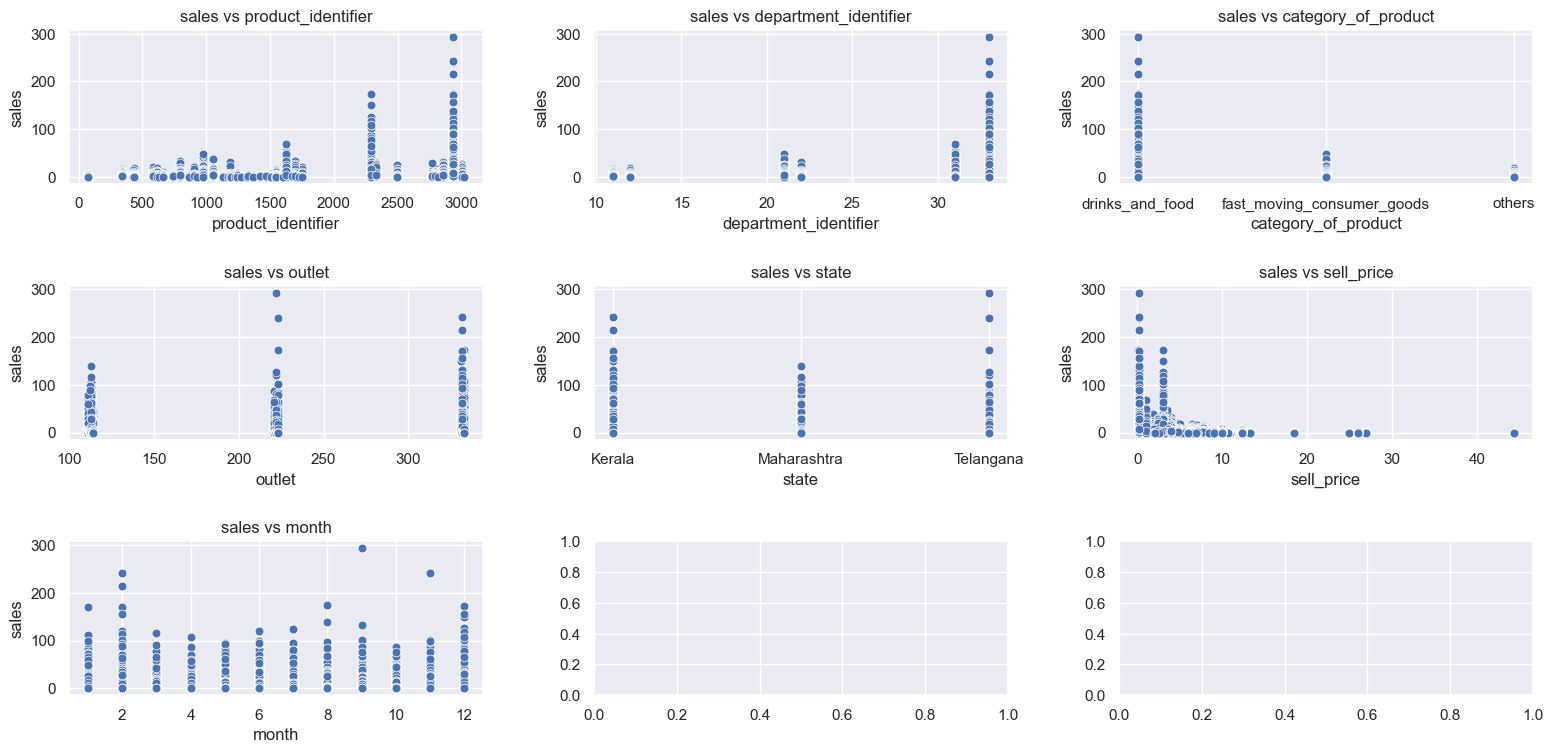

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
scatter(training_df, 'product_identifier', 0, 0)
scatter(training_df, 'department_identifier', 0, 1)
scatter(training_df, 'category_of_product', 0, 2)
scatter(training_df, 'outlet', 1, 0)
scatter(training_df, 'state', 1, 1)
scatter(training_df, 'sell_price', 1, 2)
scatter(training_df, 'month', 2, 0)
plt.tight_layout(pad=2)

### Analyze the correlation between attributes to identify any that should be discarded.

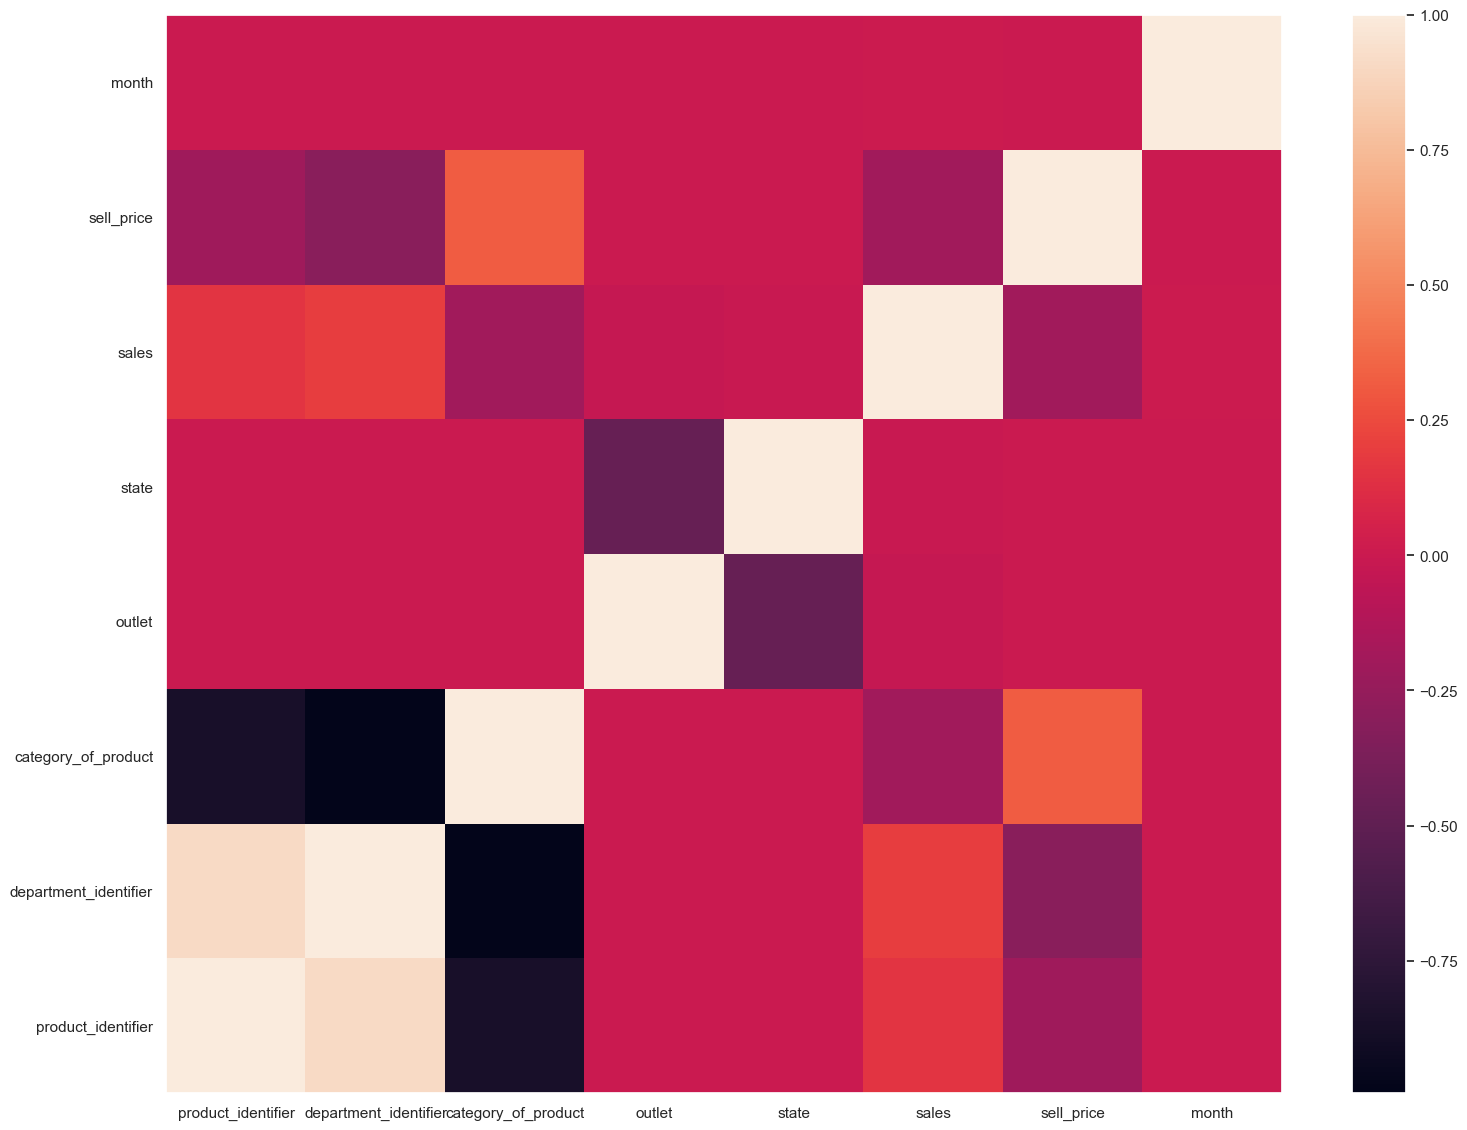

In [94]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in training_df.select_dtypes(include=['category']).columns:
    training_df[col] = le.fit_transform(training_df[col])

# Now compute the correlation
fig = plt.figure(figsize=(18, 14))
corr = training_df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c);

In [97]:
# sns.pairplot(training_df, vars=['product_identifier', 'department_identifier',
                            # 'category_of_product', 'outlet', 'state', 'sales', 'month'])

## Define the features and target variable

In [101]:
# x_train = features
# y_train = target_variable
x_train = training_df.drop(['sales'], axis=1)
y_train = training_df['sales']

In [105]:
x_train

,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month
0,74,11,2,111,1,2.94,1
1,337,11,2,111,1,7.44,1
2,423,12,2,111,1,0.97,1
3,432,12,2,111,1,4.97,1
4,581,21,1,111,1,4.88,1
...,...,...,...,...,...,...,...
394995,2932,33,0,333,0,2.78,2
394996,2935,33,0,333,0,0.20,2
394997,3004,33,0,333,0,2.50,2
394998,3008,33,0,333,0,1.98,2


## Splitting the data into training data and test data

In [122]:
from sklearn.model_selection import train_test_split
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train,
                                                                            y_train,
                                                                            test_size=0.3,
                                                                            random_state=1)

In [123]:
x_train_train

,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month
249660,868,21,1,114,1,6.97,5
357869,1196,22,1,331,0,5.94,12
35025,1328,22,1,111,1,4.97,3
24135,1694,31,0,113,1,1.97,2
256983,1629,31,0,333,0,0.98,5
...,...,...,...,...,...,...,...
73349,3021,33,0,223,2,2.08,5
371403,432,12,2,332,0,4.97,1
312201,337,11,2,221,2,7.44,9
267336,1727,31,0,223,2,2.24,6


In [ ]:
# Train Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x_train_train, y_train_train)

y_pred_lr = lr_model.predict(x_train_test)